# DATA PREPROCESSING

In [ ]:
import pandas as pd
import sklearn.neighbors._base
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")


df = pd.read_excel(r"C:\Users\nadhi\Desktop\Clinical Dashboard Project\badania_wzjg.xlsx")
df

,mayo,plec,Wiek,witD,alat,albumina,APTT,ASPAT,Bialko calkowite,BILIRUBINA CAŁKOWITA,...,Morfologia RDW-CV,Morfologia RDW-SD,OB,PT (CZAS PROTROMBINOWY) INR,Potas,Sód,"TIBC,",UIBC,TRANSFERYNA,TRÓJGLICERYDY
0,3,1,25,3.50,9.0,NaN,NaN,23.0,NaN,0.5,...,86.3,57.6,NaN,1.000,3.90,137.0,NaN,NaN,NaN,172.0
1,3,1,25,6.40,15.0,NaN,35.900,18.0,7.0,0.6,...,85.4,NaN,13.0,1.120,4.45,140.0,350.0,312.0,NaN,60.0
2,2,1,37,6.74,17.0,NaN,29.453,30.0,7.8,0.8,...,84.4,NaN,NaN,1.101,3.95,140.0,NaN,374.0,NaN,NaN
3,3,1,70,6.90,22.0,NaN,20.315,26.0,6.5,0.6,...,83.4,NaN,NaN,1.105,4.00,139.0,NaN,199.0,NaN,NaN
4,2,1,28,6.90,8.0,3.3,34.900,17.0,5.7,0.5,...,63.7,NaN,29.0,1.160,4.25,140.0,377.0,377.0,NaN,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2,1,35,NaN,172.0,NaN,44.300,157.0,8.0,1.9,...,79.4,NaN,NaN,1.070,4.07,137.0,NaN,NaN,NaN,NaN
248,1,0,75,NaN,15.0,3.7,33.800,18.0,6.7,0.4,...,89.7,NaN,51.0,1.050,4.57,133.0,302.0,201.0,NaN,73.0
249,3,1,69,NaN,22.0,NaN,30.600,19.0,NaN,1.1,...,88.2,NaN,NaN,0.930,4.17,145.0,280.0,198.0,NaN,144.0
250,3,1,23,NaN,15.0,NaN,35.000,19.0,6.8,0.5,...,79.7,NaN,NaN,1.040,3.63,139.0,306.0,288.0,NaN,79.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   mayo                         252 non-null    int64  
 1   plec                         252 non-null    int64  
 2   Wiek                         252 non-null    int64  
 3   witD                         153 non-null    float64
 4   alat                         236 non-null    float64
 5   albumina                     119 non-null    float64
 6   APTT                         219 non-null    float64
 7   ASPAT                        235 non-null    float64
 8   Bialko calkowite             196 non-null    float64
 9   BILIRUBINA CAŁKOWITA         224 non-null    float64
 10  CHOLESTEROL CAŁKOWITY        195 non-null    float64
 11  CHOLESTEROL HDL              179 non-null    float64
 12  CRP ULTRACZUŁE               238 non-null    float64
 13  CHOLESTEROL LDL     

In [ ]:
columns = ['mayo', 'plec', 'Wiek', 'alat', 'APTT', 'ASPAT',
       'Bialko calkowite', 'BILIRUBINA CAŁKOWITA', 'CHOLESTEROL CAŁKOWITY',
       'CRP ULTRACZUŁE', 'CHOLESTEROL LDL',
       'FOSFATAZA ALKALICZNA', 'GGTP', 'EGFR',
       'BAZOFILE',
       'BAZOFILE#', 'ERYTROBLASTY',
       'ERYTROBLASTY#','EOZYNOFILE', 'HEMATOKRYT', 'HEMOGLOBINA', 'LEUKOCYTY',
       'LIMFOCYTY', 'LIMFOCYTY#', 'MCH', 'MCV', 'MONOCYTY',
       'MONOCYTY#', 'NEUTROFILE', 'NEUTROFILE#',
       'NIEDOJRZAŁE GRANULOCYTY',' Morfologia RDW-CV',
       'PT (CZAS PROTROMBINOWY) INR', 'Potas',
       'Sód', 'TRÓJGLICERYDY']

df = df[columns]
df

,mayo,plec,Wiek,alat,APTT,ASPAT,Bialko calkowite,BILIRUBINA CAŁKOWITA,CHOLESTEROL CAŁKOWITY,CRP ULTRACZUŁE,...,MONOCYTY,MONOCYTY#,NEUTROFILE,NEUTROFILE#,NIEDOJRZAŁE GRANULOCYTY,Morfologia RDW-CV,PT (CZAS PROTROMBINOWY) INR,Potas,Sód,TRÓJGLICERYDY
0,3,1,25,9.0,NaN,23.0,NaN,0.5,119.0,12.98,...,6.5,0.62,69.0,6.63,0.53,86.3,1.000,3.90,137.0,172.0
1,3,1,25,15.0,35.900,18.0,7.0,0.6,153.0,18.01,...,7.2,0.58,60.8,4.91,0.10,85.4,1.120,4.45,140.0,60.0
2,2,1,37,17.0,29.453,30.0,7.8,0.8,NaN,0.94,...,11.7,1.36,62.4,7.26,NaN,84.4,1.101,3.95,140.0,NaN
3,3,1,70,22.0,20.315,26.0,6.5,0.6,NaN,55.54,...,9.5,0.43,67.2,3.04,0.04,83.4,1.105,4.00,139.0,NaN
4,2,1,28,8.0,34.900,17.0,5.7,0.5,99.0,21.73,...,8.2,0.86,74.7,7.87,0.06,63.7,1.160,4.25,140.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2,1,35,172.0,44.300,157.0,8.0,1.9,NaN,11.13,...,9.1,0.32,57.1,2.00,0.02,79.4,1.070,4.07,137.0,NaN
248,1,0,75,15.0,33.800,18.0,6.7,0.4,150.0,9.44,...,6.6,0.87,77.7,10.26,0.11,89.7,1.050,4.57,133.0,73.0
249,3,1,69,22.0,30.600,19.0,NaN,1.1,151.0,2.04,...,9.5,0.60,63.3,3.98,0.03,88.2,0.930,4.17,145.0,144.0
250,3,1,23,15.0,35.000,19.0,6.8,0.5,130.0,54.52,...,9.6,0.80,72.2,5.99,0.03,79.7,1.040,3.63,139.0,79.0


In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imp = KNNImputer(
          n_neighbors=5,
          weights='uniform',
          add_indicator= False,
          metric='nan_euclidean',
          copy=True,
          keep_empty_features=False
)

In [ ]:
imp.fit(df)

KNNImputer()

In [ ]:
df_imputed = pd.DataFrame(imp.transform(df), columns=df.columns)
df_imputed

,mayo,plec,Wiek,alat,APTT,ASPAT,Bialko calkowite,BILIRUBINA CAŁKOWITA,CHOLESTEROL CAŁKOWITY,CRP ULTRACZUŁE,...,MONOCYTY,MONOCYTY#,NEUTROFILE,NEUTROFILE#,NIEDOJRZAŁE GRANULOCYTY,Morfologia RDW-CV,PT (CZAS PROTROMBINOWY) INR,Potas,Sód,TRÓJGLICERYDY
0,3.0,1.0,25.0,9.0,33.460,23.0,6.1,0.5,119.0,12.98,...,6.5,0.62,69.0,6.63,0.530,86.3,1.000,3.90,137.0,172.0
1,3.0,1.0,25.0,15.0,35.900,18.0,7.0,0.6,153.0,18.01,...,7.2,0.58,60.8,4.91,0.100,85.4,1.120,4.45,140.0,60.0
2,2.0,1.0,37.0,17.0,29.453,30.0,7.8,0.8,175.0,0.94,...,11.7,1.36,62.4,7.26,0.026,84.4,1.101,3.95,140.0,108.6
3,3.0,1.0,70.0,22.0,20.315,26.0,6.5,0.6,209.0,55.54,...,9.5,0.43,67.2,3.04,0.040,83.4,1.105,4.00,139.0,156.2
4,2.0,1.0,28.0,8.0,34.900,17.0,5.7,0.5,99.0,21.73,...,8.2,0.86,74.7,7.87,0.060,63.7,1.160,4.25,140.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2.0,1.0,35.0,172.0,44.300,157.0,8.0,1.9,202.8,11.13,...,9.1,0.32,57.1,2.00,0.020,79.4,1.070,4.07,137.0,145.0
248,1.0,0.0,75.0,15.0,33.800,18.0,6.7,0.4,150.0,9.44,...,6.6,0.87,77.7,10.26,0.110,89.7,1.050,4.57,133.0,73.0
249,3.0,1.0,69.0,22.0,30.600,19.0,7.4,1.1,151.0,2.04,...,9.5,0.60,63.3,3.98,0.030,88.2,0.930,4.17,145.0,144.0
250,3.0,1.0,23.0,15.0,35.000,19.0,6.8,0.5,130.0,54.52,...,9.6,0.80,72.2,5.99,0.030,79.7,1.040,3.63,139.0,79.0


In [ ]:
df_imputed['mayo'] = df_imputed['mayo'].replace({0: 0, 1: 0, 2: 1, 3: 1})

In [ ]:
df_imputed

,mayo,Bialko calkowite,CRP ULTRACZUŁE,CHOLESTEROL LDL,MCH,MONOCYTY#
0,1.0,6.1,12.98,88.2,25.9,0.62
1,1.0,7.0,18.01,94.0,27.2,0.58
2,1.0,7.8,0.94,101.2,26.8,1.36
3,1.0,6.5,55.54,124.6,26.4,0.43
4,1.0,5.7,21.73,50.0,18.3,0.86
...,...,...,...,...,...,...
247,1.0,8.0,11.13,110.6,25.5,0.32
248,0.0,6.7,9.44,76.0,29.8,0.87
249,1.0,7.4,2.04,80.0,30.0,0.60
250,1.0,6.8,54.52,69.0,26.4,0.80


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import pandas as pd


X = df_imputed.drop(columns=['mayo'])
y = df_imputed['mayo']


clf = RandomForestClassifier()
clf.fit(X, y)


sfm = SelectFromModel(clf, threshold='1.25*mean')
sfm.fit(X, y)


selected_features_idx = sfm.get_support(indices=True)
selected_features = X.columns[selected_features_idx]


X_selected = X[selected_features]


print("Selected Features:")
print(selected_features)

Selected Features:
Index([], dtype='object')


In [ ]:
['Bialko calkowite', 'CRP ULTRACZUŁE', 'CHOLESTEROL LDL', 'HEMOGLOBINA',
       'LIMFOCYTY', 'MCH', 'MONOCYTY', 'MONOCYTY#', ' Morfologia RDW-CV']

['Bialko calkowite', 'CHOLESTEROL CAŁKOWITY', 'CRP ULTRACZUŁE',
       'HEMOGLOBINA', 'LIMFOCYTY', 'MCH', 'MCV', 'NEUTROFILE#',
       ' Morfologia RDW-CV']
['Bialko calkowite', 'CRP ULTRACZUŁE', 'CHOLESTEROL LDL', 'HEMOGLOBINA',
       'LIMFOCYTY', 'MCH', 'MCV', 'MONOCYTY', 'MONOCYTY#', 'NEUTROFILE']

['Bialko calkowite', 'CRP ULTRACZUŁE', 'CHOLESTEROL LDL',
       'FOSFATAZA ALKALICZNA', 'LIMFOCYTY', 'MCH', 'MCV', 'MONOCYTY',
       'MONOCYTY#', ' Morfologia RDW-CV']

['alat', 'Bialko calkowite', 'CHOLESTEROL CAŁKOWITY', 'CRP ULTRACZUŁE',
       'CHOLESTEROL LDL', 'MCH', 'MCV', 'MONOCYTY', 'MONOCYTY#']

['Bialko calkowite', 'CHOLESTEROL CAŁKOWITY', 'CRP ULTRACZUŁE',
       'CHOLESTEROL LDL', 'FOSFATAZA ALKALICZNA', 'MCH', 'MCV', 'MONOCYTY',
       'MONOCYTY#']

['Bialko calkowite',
 'CHOLESTEROL CAŁKOWITY',
 'CRP ULTRACZUŁE',
 'CHOLESTEROL LDL',
 'FOSFATAZA ALKALICZNA',
 'MCH',
 'MCV',
 'MONOCYTY',
 'MONOCYTY#']

In [ ]:
columns = ['mayo','Bialko calkowite', 'CRP ULTRACZUŁE','CHOLESTEROL LDL', 'MCH', 'MONOCYTY#']

df_imputed=df_imputed[columns]
df_imputed

,mayo,Bialko calkowite,CRP ULTRACZUŁE,CHOLESTEROL LDL,MCH,MONOCYTY#
0,1.0,6.1,12.98,88.2,25.9,0.62
1,1.0,7.0,18.01,94.0,27.2,0.58
2,1.0,7.8,0.94,101.2,26.8,1.36
3,1.0,6.5,55.54,124.6,26.4,0.43
4,1.0,5.7,21.73,50.0,18.3,0.86
...,...,...,...,...,...,...
247,1.0,8.0,11.13,110.6,25.5,0.32
248,0.0,6.7,9.44,76.0,29.8,0.87
249,1.0,7.4,2.04,80.0,30.0,0.60
250,1.0,6.8,54.52,69.0,26.4,0.80


In [ ]:
X = df_imputed.drop(columns=['mayo'])
y = df_imputed['mayo']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Step 4: Standardizing Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6206896551724138


In [ ]:
#----------------------------------------try----------------------------

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Iterate over classifiers and evaluate accuracy using cross-validation
for clf_name, clf in classifiers.items():
    scores = cross_val_score(clf, X_scaled, y_resampled, cv=3)
    print(f'{clf_name} Accuracy: {scores.mean()}')

Logistic Regression Accuracy: 0.6568058076225045
Decision Tree Accuracy: 0.6534785238959467
SVM Accuracy: 0.6603750756200848
KNN Accuracy: 0.6813672111312764
Random Forest Accuracy: 0.6955232909860859
Naive Bayes Accuracy: 0.6289171203871747


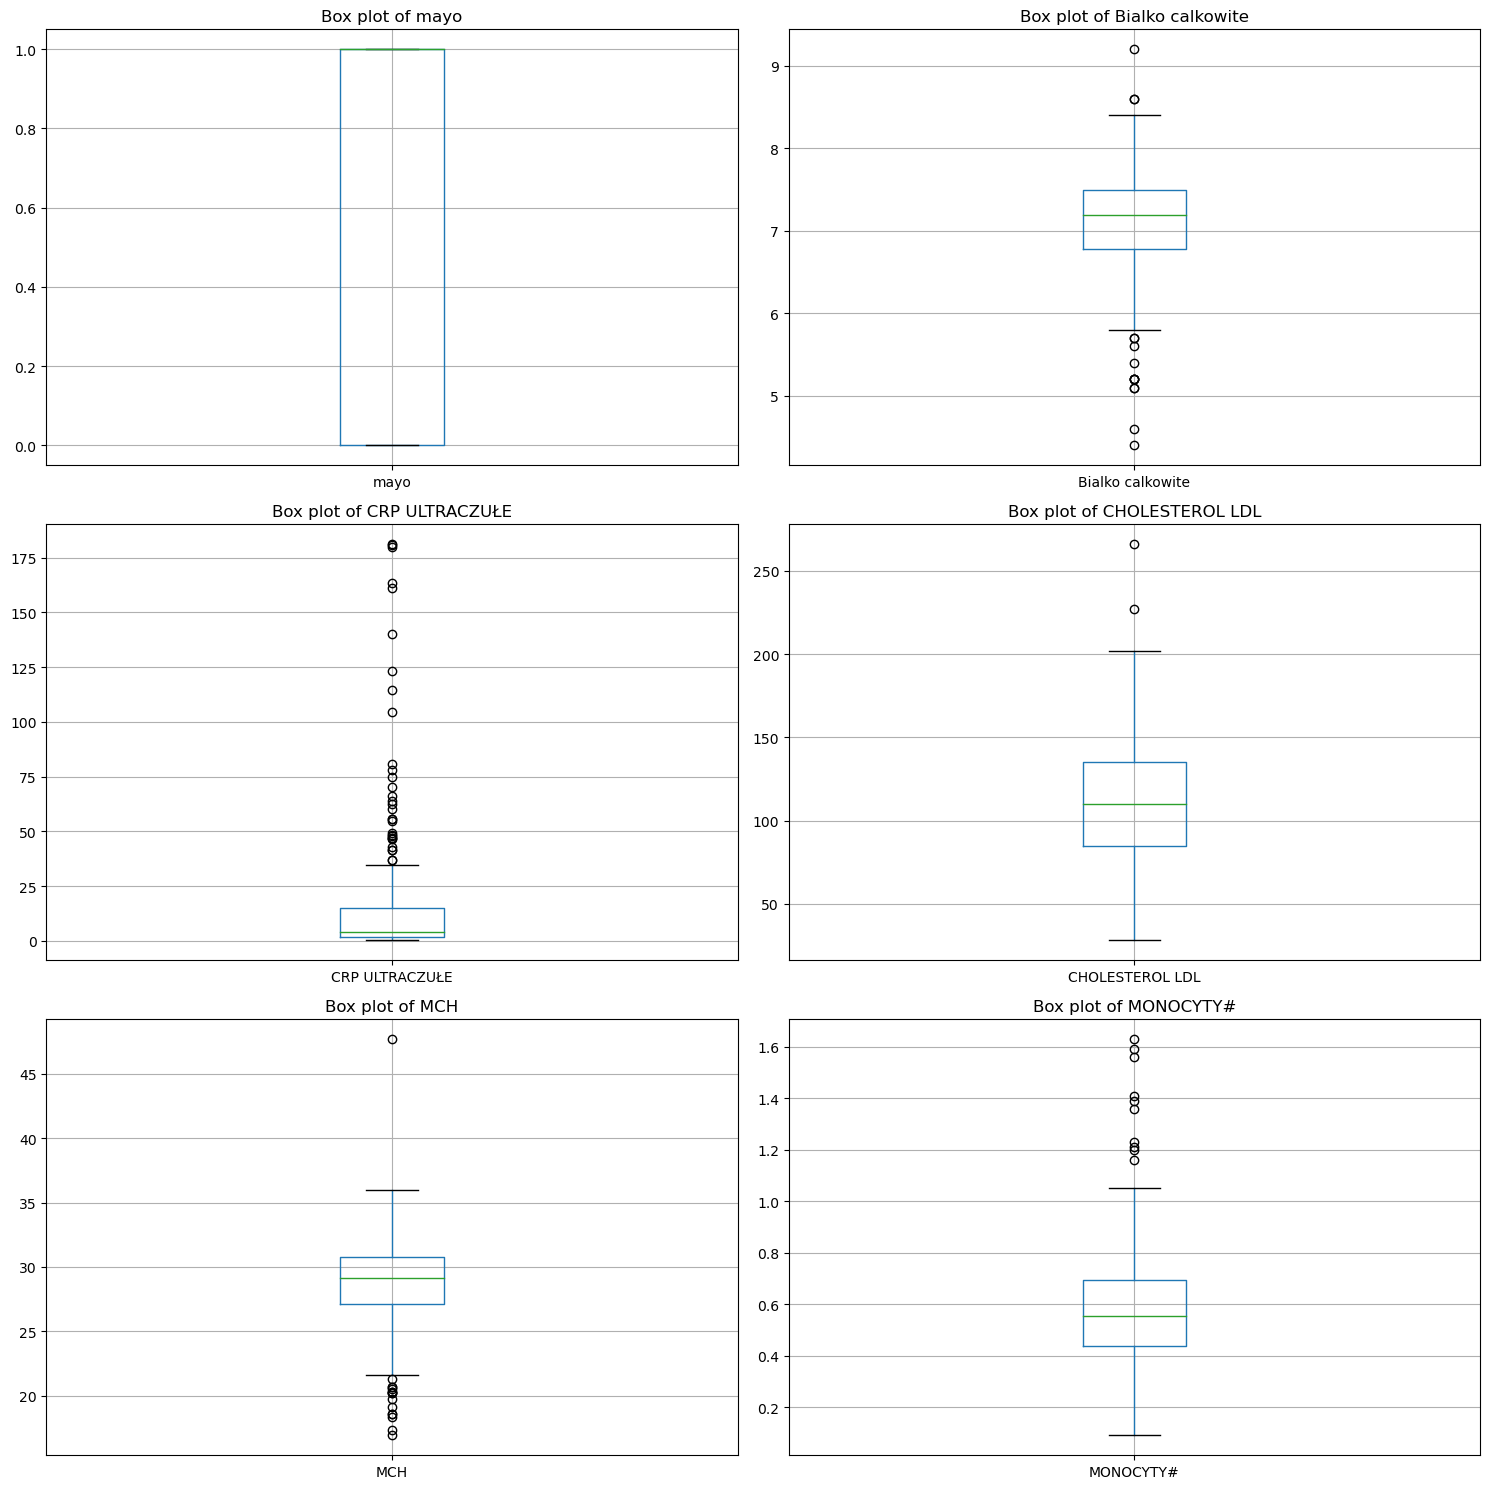

In [ ]:
num_columns = len(df_imputed.columns)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))

if num_rows > 1:
    axes = axes.flatten()

for i, column in enumerate(df_imputed.columns):
    ax = axes[i]
    df_imputed.boxplot(column=column, ax=ax)
    ax.set_title(f'Box plot of {column}')

if num_columns % 2 != 0:
    fig.delaxes(axes[-1])


plt.tight_layout()

plt.show()

In [ ]:
num_columns = len(df_imputed.columns)
num_rows = (num_columns + 1) // 2


df_no_outliers = pd.DataFrame()
for column in df_imputed.columns:
    Q1 = df_imputed[column].quantile(0.25)
    Q3 = df_imputed[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    df_no_outliers[column] = df_imputed[column][(df_imputed[column] >= lower_threshold) & (df_imputed[column] <= upper_threshold)]

df = df_no_outliers
df

,mayo,Bialko calkowite,CRP ULTRACZUŁE,CHOLESTEROL LDL,MCH,MONOCYTY#
0,1.0,6.1,12.98,88.2,25.9,0.62
1,1.0,7.0,18.01,94.0,27.2,0.58
2,1.0,7.8,0.94,101.2,26.8,NaN
3,1.0,6.5,NaN,124.6,26.4,0.43
4,1.0,NaN,21.73,50.0,NaN,0.86
...,...,...,...,...,...,...
247,1.0,8.0,11.13,110.6,25.5,0.32
248,0.0,6.7,9.44,76.0,29.8,0.87
249,1.0,7.4,2.04,80.0,30.0,0.60
250,1.0,6.8,NaN,69.0,26.4,0.80


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

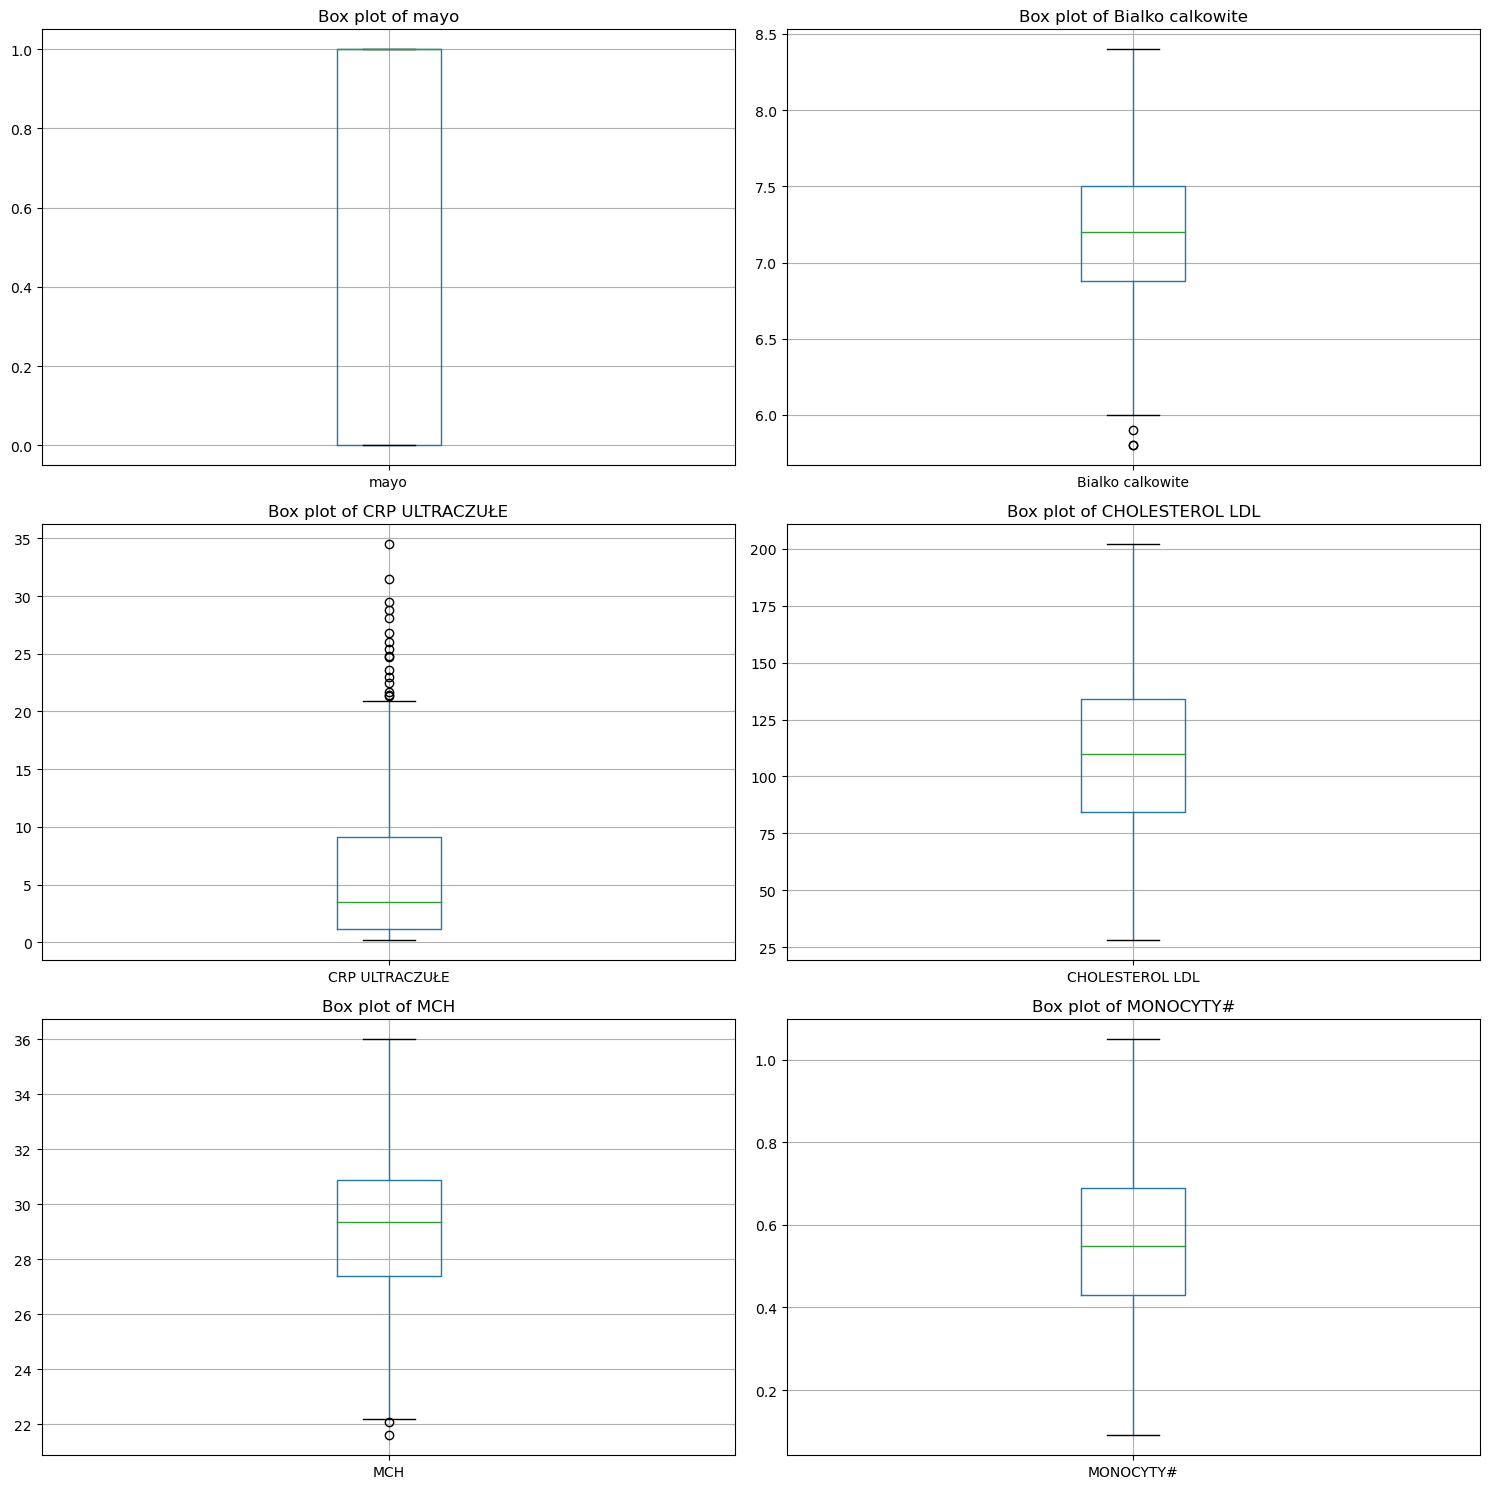

In [ ]:
num_columns = len(df.columns)
num_rows = (num_columns + 1) // 2


fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))

if num_rows > 1:
    axes = axes.flatten()

for i, column in enumerate(df.columns):
    ax = axes[i]
    df.boxplot(column=column, ax=ax)
    ax.set_title(f'Box plot of {column}')

if num_columns % 2 != 0:
    fig.delaxes(axes[-1])


plt.tight_layout()

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


df_normalized = df.copy()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_normalized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Normalized DataFrame:")
df_normalized

Normalized DataFrame:


,mayo,Bialko calkowite,CRP ULTRACZUŁE,CHOLESTEROL LDL,MCH,MONOCYTY#
0,0.873062,-2.033974,0.885936,-0.667535,-1.217135,0.314709
1,0.873062,-0.289236,1.567447,-0.497664,-0.714013,0.094308
2,0.873062,1.261643,-0.745356,-0.286789,-0.868820,NaN
3,0.873062,-1.258534,NaN,0.398553,-1.023627,-0.732195
4,0.873062,NaN,2.071467,-1.786341,NaN,1.637113
...,...,...,...,...,...,...
247,0.873062,1.649362,0.635281,-0.011481,-1.371942,-1.338297
248,-1.145394,-0.870815,0.406304,-1.024850,0.292231,1.692213
249,0.873062,0.486204,-0.596317,-0.907698,0.369634,0.204508
250,0.873062,-0.676955,NaN,-1.229867,-1.023627,1.306512


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.603448275862069


In [ ]:
df['CHOLESTEROL CAŁKOWITY'].tolist()

In [ ]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed

## Features Extraction: Choose relevant features that contribute to the classification task

In [ ]:
for column in df.columns:
    df[column].fillna(df[column].mean(), inplace=True)

In [ ]:
df

In [ ]:
['Wiek', 'CRP ULTRACZUŁE', 'HEMOGLOBINA', 'MCH', 'MONOCYTY#',
       ' Morfologia RDW-CV']

['Wiek', 'CRP ULTRACZUŁE', 'FOSFATAZA ALKALICZNA', 'HEMATOKRYT', 'MCH',
       'MCV', ' Morfologia RDW-CV']
['Wiek', 'CRP ULTRACZUŁE', 'FOSFATAZA ALKALICZNA', 'LIMFOCYTY', 'MCH',
       'MCV', ' Morfologia RDW-CV']
['Wiek', 'CRP ULTRACZUŁE', 'HEMOGLOBINA', 'MCH', 'MCV', 'MONOCYTY#',
       ' Morfologia RDW-CV']
['Wiek', 'CRP ULTRACZUŁE', 'MCH', ' Morfologia RDW-CV']

['Wiek', 'CRP ULTRACZUŁE', 'FOSFATAZA ALKALICZNA', 'HEMATOKRYT', 'MCH',
       'MCV', ' Morfologia RDW-CV']
['Wiek', 'CRP ULTRACZUŁE', 'MCH', 'MCV', ' Morfologia RDW-CV']

['Wiek', 'CRP ULTRACZUŁE', 'FOSFATAZA ALKALICZNA', 'MCH', 'MCV',
       ' Morfologia RDW-CV']

In [ ]:
columns = ['Wiek', 'CRP ULTRACZUŁE', 'MCH', ' Morfologia RDW-CV']

df = df[columns]
df

In [ ]:
# columns = ['Wiek', 'alat', 'Bialko calkowite', 'CHOLESTEROL CAŁKOWITY',
#        'CRP ULTRACZUŁE', 'CHOLESTEROL LDL', 'FOSFATAZA ALKALICZNA', 'GGTP',
#        'HEMATOKRYT', 'HEMOGLOBINA', 'LIMFOCYTY', 'LIMFOCYTY#', 'MCH', 'MCV',
#        'MONOCYTY', 'MONOCYTY#', ' Morfologia RDW-CV', 'TRÓJGLICERYDY']

# df = df[columns]

In [ ]:
df.info()

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


df_normalized = df.copy()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Select numerical columns
df_normalized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Normalized DataFrame:")
df_normalized

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming X_selected contains your standardized and selected feature matrix
# Assuming y contains your target variable before removing outliers

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Fit a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)